# Compare Cronbach's alpha to split-halves reliability


NOTE
--
This part was run on Colab and it was for compatibility reasons as the package pingouin wasn't compatible with packages and versions used in the rest of the paper.


# Install all needed packages



In [1]:
!pip install watermark
!pip install pingouin

# Access and load data

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Start the regular code

https://pingouin-stats.org/build/html/generated/pingouin.cronbach_alpha.html#pingouin.cronbach_alpha


```
Cronbach’s Alpha	Internal consistency

0.9 ≤ α	Excellent
0.8 ≤ α < 0.9	Good
0.7 ≤ α < 0.8	Acceptable
0.6 ≤ α < 0.7	Questionable
0.5 ≤ α < 0.6	Poor
α < 0.5	Unacceptable
```

```
# Importing libraries
import pandas as pd
import numpy as np

def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha
# Calling function to the calculate value of Cronbach's alpha
cronbach_alpha(data)
```

In [3]:
import os, sys
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg



# Define path and name
path_drive = './Reliability_paper'



# Importing module for functions
functions_modul =  os.path.join(path_drive, "Code", "functions")
sys.path.insert(0, functions_modul)

# from plot_functions import label_column_height, star_gazing, label_correlation, corrfunc, plot_convergence
from reliability_functions import check_df_get_numbers, run_reliability_estimate4many_trials, split_dataframes_faster_chunks

# define the rest of the paths
csv_raw_data_path = os.path.join(path_drive, "Data", "raw_CSV")
csv_raw_pilot_data_path =  os.path.join(path_drive, "Data", "raw_CSV","piloting")

csv_clean_data_path = os.path.join(path_drive, "Data", "cleaned_CSV")
path_results = os.path.join(path_drive, "Data", "results")
path_curve_fit = os.path.join(path_results, "curve_fits")

# define confidence interval for Cronbach's alpha
ci_cronbach = 0.95



In [4]:
# define manually num of trials
n_trials_per_form = 72
num_forms = 2

test="CCMT"

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets

df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'CCMT-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'CCMT-cleaned_data_rep.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]


df_CCMT_concat = pd.concat([
    df1,
    df2,
])

# take only the full data
df_CCMT_concat = df_CCMT_concat[df_CCMT_concat["userID"].isin(shared_participants)].reset_index(drop=True)

Running 2 replicate studies with total 154 participants.


In [5]:
# read the previously computed data
df_CCMT_reliability = pd.read_csv(os.path.join(path_curve_fit, 'CCMT_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv'))

# define dataset
df_cronbach = pd.DataFrame()
# compute cronbach alpha
for n in df_CCMT_reliability["n_trials"].unique():
  alpha, ci = pg.cronbach_alpha(data=df_CCMT_concat.loc[df_CCMT_concat['trial_number']<=n, ['userID', 'trial_number', 'correct']],
                  subject='userID', scores='correct', items='trial_number', ci=ci_cronbach)
  df_cronbach = df_cronbach.append(pd.DataFrame({
      'n_trials': [n],
      'cronbach_alpha': [alpha],
      'CI_low': [ci[0]],
      'CI_high': [ci[1]],
  }))

df_cronbach

<ipython-input-5-442d43c4c360>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cronbach = df_cronbach.append(pd.DataFrame({
<ipython-input-5-442d43c4c360>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cronbach = df_cronbach.append(pd.DataFrame({
<ipython-input-5-442d43c4c360>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cronbach = df_cronbach.append(pd.DataFrame({
<ipython-input-5-442d43c4c360>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cronbach = df_cronbach.append(pd.DataFrame({
<ipython-input-5-442d43c4c360>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

,n_trials,cronbach_alpha,CI_low,CI_high
0,5,0.416865,0.262,0.549
0,10,0.541628,0.426,0.642
0,15,0.600682,0.502,0.687
0,20,0.674496,0.595,0.745
0,25,0.729275,0.664,0.787
0,30,0.774789,0.720,0.823
0,35,0.797957,0.749,0.841
0,40,0.797217,0.749,0.840
0,45,0.809244,0.764,0.850
0,50,0.821066,0.778,0.859


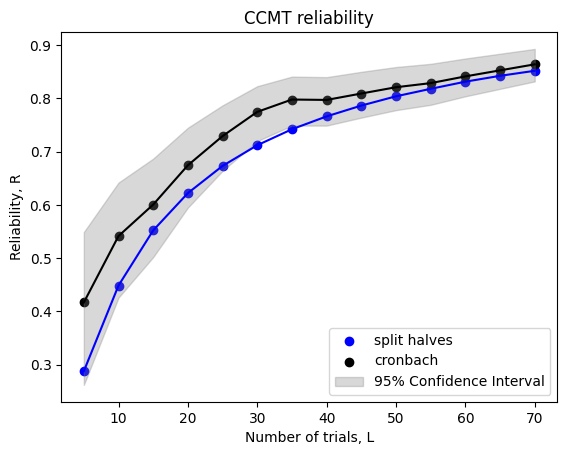

In [6]:

fig, axs = plt.subplots(1,1)

# plot reliability plot
axs.scatter(df_CCMT_reliability['n_trials'], df_CCMT_reliability['reliability'], label='split halves', c='b')
axs.plot(df_CCMT_reliability['n_trials'], df_CCMT_reliability['reliability'], c='b')

# add cronbach
axs.scatter(df_cronbach['n_trials'], df_cronbach['cronbach_alpha'], label='cronbach', c='k')
axs.plot(df_cronbach['n_trials'], df_cronbach['cronbach_alpha'], c='k')
# add confidence interval, fill the area between lower and upper with color grey and 0.3 alpha (transparency)
axs.fill_between(df_cronbach['n_trials'], df_cronbach['CI_low'], df_cronbach['CI_high'], color='grey', alpha=0.3, label=f'{int(ci_cronbach*100)}% Confidence Interval')


axs.set_xlabel('Number of trials, L')
axs.set_ylabel('Reliability, R')
axs.set_title('CCMT reliability')
plt.legend()
plt.show()

## Run all tasks


In [7]:
test_names = [
'CCMT',
'CFMT',
'car_matching',
'emotion_matching',
'emotion_labelling',
'FMP',
'GFMT',
'MST',
'PIM_MC',
'PIM_recog',
'PGNG',
'RISE',
'SCAP',
'n_back',
'VET_birds_planes_leaves',
]

print(len(test_names))

15


## Load all datasets

In [8]:
# define manually num of trials
n_trials_per_form = 72
num_forms = 2

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'CCMT-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'CCMT-cleaned_data_rep.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]

# concat
df_CCMT_concat = pd.concat([
    df1,
    df2,
])

# take only the full data
df_CCMT_concat = df_CCMT_concat[df_CCMT_concat["userID"].isin(shared_participants)].reset_index(drop=True)

Running 2 replicate studies with total 154 participants.


In [9]:
# define manually num of trials
n_trials_per_form = 72
num_forms = 5

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus2-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_F2-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_F-cleaned_data.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_Aus2-cleaned_data.csv'))
df3 = pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_F2-cleaned_data.csv'))
df4 = pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_Aus-cleaned_data.csv'))
df5 = pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_F-cleaned_data.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]
df3['trial_number'] = [x+2*n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df3['userID'].unique()))]
df4['trial_number'] = [x+3*n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df4['userID'].unique()))]
df5['trial_number'] = [x+4*n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df5['userID'].unique()))]

# concat
df_CFMT_concat = pd.concat([
    df1,
    df2,
    df3,
    df4,
    df5,
])

# take only the full data
df_CFMT_concat = df_CFMT_concat[df_CFMT_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_CFMT_concat.userID.value_counts()[df_CFMT_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 5 replicate studies with total 58 participants.
Series([], Name: userID, dtype: int64)


In [10]:
# define manually num of trials
n_trials_per_form = 40
num_forms = 2

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "car_matching-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "car_matching-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'car_matching-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'car_matching-cleaned_data_rep.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]

# concat
df_car_matching_concat = pd.concat([
    df1,
    df2,
])

# take only the full data
df_car_matching_concat = df_car_matching_concat[df_car_matching_concat["userID"].isin(shared_participants)].reset_index(drop=True)


# should be empty -- test if people don't have more than 1 entry
print(df_car_matching_concat.userID.value_counts()[df_car_matching_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 173 participants.
Series([], Name: userID, dtype: int64)


In [11]:
# define manually num of trials
n_trials_per_form = 65
num_forms = 2

# load the first set
df_emotion_matching = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching-cleaned_data.csv"))
df_emotion_matching["correct"] = df_emotion_matching["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("Test first set")
print(df_emotion_matching.userID.value_counts()[df_emotion_matching.userID.value_counts()!=65])#.keys()

# load the second set
df_emotion_matching_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching_rep-cleaned_data.csv"))
df_emotion_matching_stand["correct"] = df_emotion_matching_stand["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("\nTest second set")
print(df_emotion_matching_stand.userID.value_counts()[df_emotion_matching_stand.userID.value_counts()!=100])#.keys()

# add a trial number, done manually
df_emotion_matching['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df_emotion_matching['userID'].unique()))]
df_emotion_matching_stand['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(100),len(df_emotion_matching_stand['userID'].unique()))]


######

# get names of stimulu
df_emotion_matching_stand["face1"] = df_emotion_matching_stand["face1"].str.split('/').str[-1]
df_emotion_matching_stand["face2"] = df_emotion_matching_stand["face2"].str.split('/').str[-1]
df_emotion_matching_stand["face3"] = df_emotion_matching_stand["face3"].str.split('/').str[-1]

# to be able to take the old trials only, here, I create a new variable "test" which is a combination of the 3 stimuli
# which uniquely determine a trial. Since the assignment of the stimuli to a column is random, we can simply compare.
# Therefore, I first combine the three cols, then sort values within this and convert it into a string. Using this
# string and userID, I then merge the two datasets --> that means that there are only the shared participants together
# with the overlapping trials
df_emotion_matching_stand["test"] = np.sort(df_emotion_matching_stand[["face1", "face2", "face3"]].values,axis=1).tolist()
df_emotion_matching["test"] = np.sort(df_emotion_matching[["face1", "face2", "face3"]].values,axis=1).tolist()

df_emotion_matching["test"]=df_emotion_matching["test"].apply(lambda x: ','.join(map(str, x)))
df_emotion_matching_stand["test"]=df_emotion_matching_stand["test"].apply(lambda x: ','.join(map(str, x)))

# merge the two dataframes to only take the intersection -- takes care of both userID and the shared target
df_merged = df_emotion_matching.merge(df_emotion_matching_stand, on=["userID", "test"])

# split it and make it into a long format, back, rename cols to be the same again
df_emotion_matching_concat = pd.concat([
    df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_x') or x=='userID']].rename(columns = lambda x: x.strip('_x')),
    df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_y') or x=='userID']].rename(columns = lambda x: x.strip('_y')),
])

# should be empty -- test if people don't have more than 1 entry
print("\nTest combined set")
print(df_emotion_matching_concat.userID.value_counts()[df_emotion_matching_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()
# this has for some reason 122

Test first set
Series([], Name: userID, dtype: int64)

Test second set
Series([], Name: userID, dtype: int64)

Test combined set
s_100    122
s_21     122
s_242    122
s_245    122
s_246    122
        ... 
s_173    122
s_175    122
s_176    122
s_177    122
s_99     122
Name: userID, Length: 161, dtype: int64


In [12]:
# define manually num of trials
n_trials_per_form = 48
num_forms = 2

# load the first set
df_emotion_labelling = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling-cleaned_data.csv"))
df_emotion_labelling["correct"] = df_emotion_labelling["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("Test first set")
print(df_emotion_labelling.userID.value_counts()[df_emotion_labelling.userID.value_counts()!=n_trials_per_form])#.keys()

df_emotion_labelling_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling_rep-cleaned_data.csv"))
df_emotion_labelling_stand["correct"] = df_emotion_labelling_stand["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print("\nTest second set")
print(df_emotion_labelling_stand.userID.value_counts()[df_emotion_labelling_stand.userID.value_counts()>100])#.keys()


# add a trial number, done manually
df_emotion_labelling['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df_emotion_labelling['userID'].unique()))]
df_emotion_labelling_stand['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(100),len(df_emotion_labelling_stand['userID'].unique()))]


######

df_emotion_labelling_stand["target"] = df_emotion_labelling_stand["target"].str.split('/').str[-1]

# get participants who have both data
shared_participants = list(set(df_emotion_labelling['userID'])&set(df_emotion_labelling_stand['userID']))

# get target set of original stimuli
target_set = df_emotion_labelling.target.unique()

shared_target = list(set(df_emotion_labelling['target'])&set(df_emotion_labelling_stand['target']))
print(f"Running all replicate studies with total {len(shared_participants)} participants and {len(shared_target)} stimuli.")

df_emotion_labelling_concat = pd.concat([
    df_emotion_labelling_stand.loc[(df_emotion_labelling_stand["target"].isin(shared_target))&\
                                   (df_emotion_labelling_stand["userID"].isin(shared_participants))].copy(),
    df_emotion_labelling.loc[(df_emotion_labelling["target"].isin(shared_target))&\
                             (df_emotion_labelling["userID"].isin(shared_participants))].copy()
])

# should be empty -- test if people don't have more than 1 entry
print("\nTest combined set")
print(df_emotion_labelling_concat.userID.value_counts()[df_emotion_labelling_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()
# this has for some reason a different count

Test first set
Series([], Name: userID, dtype: int64)

Test second set
Series([], Name: userID, dtype: int64)
Running all replicate studies with total 166 participants and 45 stimuli.

Test combined set
s_1      90
s_242    90
s_246    90
s_247    90
s_251    90
         ..
s_173    90
s_175    90
s_176    90
s_177    90
s_99     90
Name: userID, Length: 166, dtype: int64


In [13]:
# define manually num of trials
n_trials_per_form = 180
num_forms = 2

if num_forms == 1:
    # get participants who have both data
    shared_participants = list(
        set(pd.read_csv(os.path.join(csv_clean_data_path, "FMP-cleaned_data.csv"), usecols=['userID']).userID)
    )

    # load and concat the datasets
    df_FMP_concat = pd.concat([
        pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data.csv')),
    ])

else:
    # get participants who have both data
    shared_participants = list(
        set(pd.read_csv(os.path.join(csv_clean_data_path, "FMP-cleaned_data.csv"), usecols=['userID']).userID)&\
        set(pd.read_csv(os.path.join(csv_clean_data_path, "FMP-cleaned_data_rep.csv"), usecols=['userID']).userID)
    )

    # load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
    df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data.csv'))
    df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data_rep.csv'))

    # add a trial number
    df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
    df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]

    # concat
    df_FMP_concat = pd.concat([df1, df2])


print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# take only the full data
df_FMP_concat = df_FMP_concat[df_FMP_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# take only what we really need
df_FMP_concat = df_FMP_concat[["userID", "task", "difficulty", "correct_flt", 'trial_number']].copy()
df_FMP_concat.rename(columns={'correct_flt':'correct'}, inplace=True)

# should be empty -- test if people don't have more than 1 entry
print(df_FMP_concat.userID.value_counts()[df_FMP_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 119 participants.
Series([], Name: userID, dtype: int64)


In [14]:
# define manually num of trials
n_trials_per_form = 40
num_forms = 2

test="GFMT"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data_rep.csv"), usecols=['userID']).userID)
)

# get overlaping stimuli
shared_target = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data.csv"), usecols=['FaceStim']).FaceStim)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data_rep.csv"), usecols=['FaceStim']).FaceStim)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants and {len(shared_target)} stimuli.")


# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'GFMT-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'GFMT-cleaned_data_rep.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(168),len(df2['userID'].unique()))]

# concat
df_GFMT_concat = pd.concat([df1, df2])

# take only the full data
df_GFMT_concat = df_GFMT_concat[(df_GFMT_concat["FaceStim"].isin(shared_target))&(df_GFMT_concat["userID"].isin(shared_participants))].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_GFMT_concat.userID.value_counts()[df_GFMT_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 157 participants and 40 stimuli.
Series([], Name: userID, dtype: int64)


In [15]:
# define manually num of trials
n_trials_per_form = 320
num_forms = 2

test="MST"
# save the name so that we have easier job later
test_names.append(test)

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "MST-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "MST-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'MST-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'MST-cleaned_data_rep.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]

# concat
df_MST_concat = pd.concat([df1, df2])

# take only the full data
df_MST_concat = df_MST_concat[df_MST_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# drop the people who do not have two full sets -- TODO, decide, maybe can be filled
df_MST_concat = df_MST_concat[df_MST_concat["userID"].isin(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()==num_forms*n_trials_per_form].keys())]

print(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 84 participants.
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [16]:
# define manually num of trials
n_trials_per_form = 24
num_forms = 2

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_MC-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_MC-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies (in total {num_forms}) with total {len(shared_participants)} participants.")

# load and concat the datasets
df_PIM_MC_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_MC-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_MC-cleaned_data_rep.csv')),
])

# take only the full data
df_PIM_MC_concat = df_PIM_MC_concat[df_PIM_MC_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_PIM_MC_concat.userID.value_counts()[df_PIM_MC_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# combine all 4 measures
MC_tasks = ['hobby', 'vice', 'country', 'code_name']

df_PIM_MC = pd.concat(
    [df_PIM_MC_concat[["userID",x]].rename(columns={x:"correct"}) for x in MC_tasks]
).sort_values(by='userID')

# add a trial number
df_PIM_MC['trial_number'] = [x for x in np.tile(np.arange(4*num_forms*n_trials_per_form),len(df_PIM_MC['userID'].unique()))]

Running 2 replicate studies (in total 2) with total 152 participants.
Series([], Name: userID, dtype: int64)


In [17]:
# define manually num of trials
n_trials_per_form = 2*2*24
num_forms = 2

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_recog-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_recog-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies (in total {num_forms}) with total {len(shared_participants)} participants.")


# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_recog-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_recog-cleaned_data_rep.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]

# concat
df_PIM_recog_concat = pd.concat([df1, df2])

# take only the full data
df_PIM_recog_concat = df_PIM_recog_concat[df_PIM_recog_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_PIM_recog_concat.userID.value_counts()[df_PIM_recog_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# drop those people for now
df_PIM_recog_concat = df_PIM_recog_concat[~df_PIM_recog_concat["userID"].isin(df_PIM_recog_concat.userID.value_counts()[df_PIM_recog_concat.userID.value_counts()!=(num_forms*n_trials_per_form)].keys())]

# check again
print("\nCheck again")
print(df_PIM_recog_concat.userID.value_counts()[df_PIM_recog_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# convert correct
df_PIM_recog_concat["correct"] = df_PIM_recog_concat["correct"].astype(float)
df_PIM_recog_concat["seen"] = df_PIM_recog_concat["seen"].str.lower()

Running 2 replicate studies (in total 2) with total 152 participants.
Series([], Name: userID, dtype: int64)

Check again
Series([], Name: userID, dtype: int64)


In [18]:
# define manually num of trials
n_trials_per_form = 142#-26 # dropping the first level
num_forms = 2


# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PGNG-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PGNG-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")


# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'PGNG-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'PGNG-cleaned_data_rep.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]

# concat
df_PGNG_concat = pd.concat([df1, df2])

# take only the full data
df_PGNG_concat = df_PGNG_concat[df_PGNG_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# # drop the first block
# df_PGNG_concat = df_PGNG_concat[df_PGNG_concat["block"]!=1]

# should be empty -- test if people don't have more than 1 entry
print(df_PGNG_concat.userID.value_counts()[df_PGNG_concat.userID.value_counts()>2*n_trials_per_form])#.keys()

Running 2 replicate studies with total 152 participants.
Series([], Name: userID, dtype: int64)


In [19]:
# define manually num of trials
n_trials_per_form = 36
num_forms = 2

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "RISE-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "RISE-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies (in total {num_forms}) with total {len(shared_participants)} participants.")

# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'RISE-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'RISE-cleaned_data_rep.csv'))

# add a trial number, must be done manually
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(70),len(df2['userID'].unique()))]

# concat
df_RISE_concat = pd.concat([df1, df2])

# take only the full data
df_RISE_concat = df_RISE_concat[df_RISE_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_RISE_concat.userID.value_counts()[df_RISE_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

# rename cols to take the correct answer
df_RISE_concat.rename(columns={"correct":"for_sure_wrong_correct", "my_correct":"correct"}, inplace=True)



Running 2 replicate studies (in total 2) with total 109 participants.
s_100    106
s_254    106
s_43     106
s_42     106
s_40     106
        ... 
s_160    106
s_158    106
s_157    106
s_156    106
s_99     106
Name: userID, Length: 109, dtype: int64


In [20]:
# define manually num of trials
n_trials_per_form = 72
num_forms = 2

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "SCAP-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "SCAP-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'SCAP-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'SCAP-cleaned_data_rep.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]

# concat
df_SCAP_concat = pd.concat([df1, df2])

# take only the full data
df_SCAP_concat = df_SCAP_concat[df_SCAP_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_SCAP_concat.userID.value_counts()[df_SCAP_concat.userID.value_counts()!=num_forms*n_trials_per_form])#.keys()

Running 2 replicate studies with total 162 participants.
Series([], Name: userID, dtype: int64)


In [21]:
# define manually num of trials
n_trials_per_form_all = 138 # 48+45+45
n_trials_per_form_acc = 45
num_forms = 2

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "nback-cleaned_data_day1.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "nback-cleaned_data_day2.csv"), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'nback-cleaned_data_day1.csv'), usecols=["userID", "level", "correct_response", "response_type", "correct"])
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'nback-cleaned_data_day2.csv'), usecols=["userID", "level", "correct_response", "response_type", "correct"])

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form_all),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form_all for x in np.tile(np.arange(n_trials_per_form_all),len(df2['userID'].unique()))]

# concat
df_nback_concat = pd.concat([df1, df2])

# take only the full data
df_nback_concat = df_nback_concat[df_nback_concat["userID"].isin(shared_participants)].reset_index(drop=True)


# should be empty -- test if people don't have more than 1 entry
print(df_nback_concat.userID.value_counts()[df_nback_concat.userID.value_counts()!=num_forms*n_trials_per_form_all])#.keys()

Running all replicate studies with total 93 participants.
Series([], Name: userID, dtype: int64)


In [22]:
# define manually num of trials
n_trials_per_form = 51
num_forms = 3

# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_planes-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_birds-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "VET_leaves-cleaned_data.csv"), usecols=['userID']).userID)
)
print(f"Running {num_forms} replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets, they have to be loaded separately because I want to add the trial number but also preserve the order of trials
df1 = pd.read_csv(os.path.join(csv_clean_data_path, 'VET_planes-cleaned_data.csv'))
df2 = pd.read_csv(os.path.join(csv_clean_data_path, 'VET_birds-cleaned_data.csv'))
df3 = pd.read_csv(os.path.join(csv_clean_data_path, 'VET_leaves-cleaned_data.csv'))

# add a trial number
df1['trial_number'] = [x for x in np.tile(np.arange(n_trials_per_form),len(df1['userID'].unique()))]
df2['trial_number'] = [x+n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df2['userID'].unique()))]
df3['trial_number'] = [x+2*n_trials_per_form for x in np.tile(np.arange(n_trials_per_form),len(df3['userID'].unique()))]

# concat
df_VET_planes_birds_leaves_concat = pd.concat([
    df1,
    df2,
    df3,
])

# take only the full data
df_VET_planes_birds_leaves_concat = df_VET_planes_birds_leaves_concat[df_VET_planes_birds_leaves_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_VET_planes_birds_leaves_concat.userID.value_counts()[df_VET_planes_birds_leaves_concat.userID.value_counts()>num_forms*n_trials_per_form])#.keys()

Running 3 replicate studies with total 106 participants.
Series([], Name: userID, dtype: int64)


## Plot everything

In [23]:
test_names

['CCMT',
 'CFMT',
 'car_matching',
 'emotion_matching',
 'emotion_labelling',
 'FMP',
 'GFMT',
 'MST',
 'PIM_MC',
 'PIM_recog',
 'PGNG',
 'RISE',
 'SCAP',
 'n_back',
 'VET_birds_planes_leaves',
 'GFMT',
 'MST']

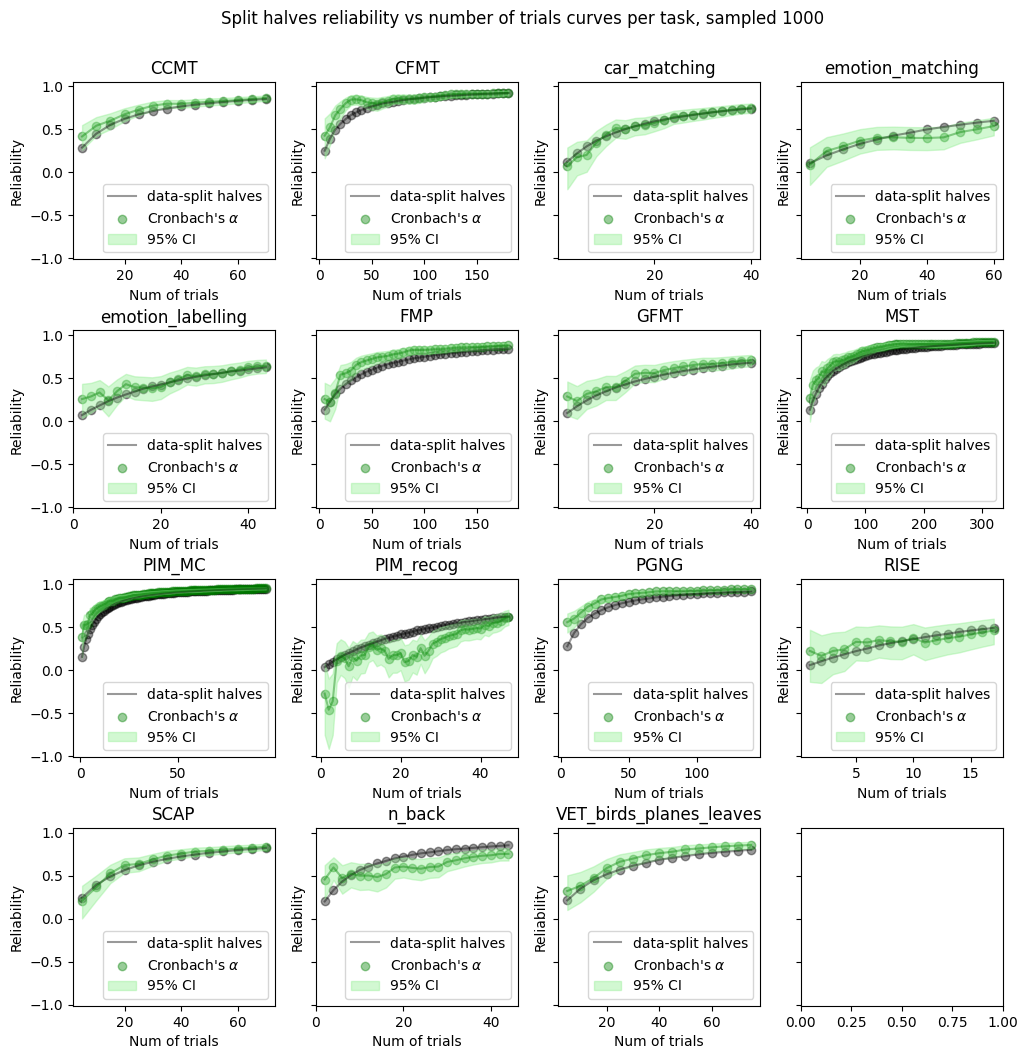

In [24]:
# define dataset
df_cronbach_tasks = pd.DataFrame()

list_df = [df_CCMT_concat, df_CFMT_concat, df_car_matching_concat, df_emotion_matching_concat, df_emotion_labelling_concat, df_FMP_concat, df_GFMT_concat,
           df_MST_concat, df_PIM_MC, df_PIM_recog_concat, df_PGNG_concat, df_RISE_concat, df_SCAP_concat, df_nback_concat, df_VET_planes_birds_leaves_concat]

fig, axs = plt.subplots(4, 4, figsize=(12,12), sharey=True)
plt.subplots_adjust(hspace=0.4)

for tsk, df_task, ax in zip(test_names, list_df, axs.flatten()):
    df_tmp = None
    # find the file
    try:
        file = [i for i in os.listdir(path_curve_fit) if i.startswith(tsk+'_long') and i.endswith('-fit.csv')][0]
    except IndexError:
        print(tsk)
    df_tmp = pd.read_csv(os.path.join(path_curve_fit, file))

    # compute cronbach alpha
    for n in df_tmp["n_trials"].unique():
      alpha, ci = pg.cronbach_alpha(data=df_task.loc[df_task['trial_number']<=n, ['userID', 'trial_number', 'correct']],
                      subject='userID', scores='correct', items='trial_number', ci=ci_cronbach)
      # df_cronbach_tasks = df_cronbach_tasks.append(pd.DataFrame({
      #     'task': [tsk],
      #     'n_trials': [n],
      #     'cronbach_alpha': [alpha],
      #     'CI_low': [ci[0]],
      #     'CI_high': [ci[1]],
      #     'reliability': [df_tmp.loc[df_tmp["n_trials"]==n, "reliability"].values[0]],
      # }))
      df_cronbach_tasks = pd.concat([df_cronbach_tasks, pd.DataFrame({
                'task': [tsk],
                'n_trials': [n],
                'cronbach_alpha': [alpha],
                'CI_low': [ci[0]],
                'CI_high': [ci[1]],
                'reliability': [df_tmp.loc[df_tmp["n_trials"]==n, "reliability"].values[0]],
            })])

    ### PLOT

    ax.plot(df_tmp["n_trials"], df_tmp["reliability"], c='k', label="data-split halves", alpha=0.4)
    ax.scatter(df_tmp["n_trials"], df_tmp["reliability"], c='k', alpha=0.4)
    # add max label
    # ax.axhline(df_tmp["reliability"].max(), c="orange", label=f"max={df_tmp['reliability'].max():.2f}")

    # this is wrong and I don't know how to do that
#     # add form label
#     ax.axvline(df_trials.loc[df_trials["Task"].str.startswith(tsk), "num_trials"].values[0], c="k", ls='--', alpha=0.5, label="full form")

    # add cronbach
    ax.scatter(df_cronbach_tasks.loc[df_cronbach_tasks['task']==tsk, 'n_trials'], df_cronbach_tasks.loc[df_cronbach_tasks['task']==tsk, 'cronbach_alpha'], label=r"Cronbach's $\alpha$", c='green', alpha=0.4)
    ax.plot(df_cronbach_tasks.loc[df_cronbach_tasks['task']==tsk, 'n_trials'], df_cronbach_tasks.loc[df_cronbach_tasks['task']==tsk, 'cronbach_alpha'], c='green', alpha=0.4)
    # add confidence interval, fill the area between lower and upper with color grey and 0.3 alpha (transparency)
    ax.fill_between(df_cronbach_tasks.loc[df_cronbach_tasks['task']==tsk, 'n_trials'], df_cronbach_tasks.loc[df_cronbach_tasks['task']==tsk, 'CI_low'], df_cronbach_tasks.loc[df_cronbach_tasks['task']==tsk, 'CI_high'], color='lightgreen', alpha=0.4, label=f'{int(ci_cronbach*100)}% CI')

    ax.set_title(tsk)
    ax.set_xlabel("Num of trials")
    ax.set_ylabel("Reliability")

    ax.legend(loc="lower right")

plt.suptitle("Split halves reliability vs number of trials curves per task, sampled 1000", y=.94)

plt.show()





### Save the cronbach data

In [25]:
df_cronbach_tasks

,task,n_trials,cronbach_alpha,CI_low,CI_high,reliability
0,CCMT,5,0.416865,0.262,0.549,0.287813
0,CCMT,10,0.541628,0.426,0.642,0.448679
0,CCMT,15,0.600682,0.502,0.687,0.552216
0,CCMT,20,0.674496,0.595,0.745,0.622211
0,CCMT,25,0.729275,0.664,0.787,0.673306
...,...,...,...,...,...,...
0,VET_birds_planes_leaves,55,0.815891,0.762,0.863,0.748148
0,VET_birds_planes_leaves,60,0.829069,0.779,0.872,0.764251
0,VET_birds_planes_leaves,65,0.841255,0.795,0.881,0.777364
0,VET_birds_planes_leaves,70,0.849703,0.806,0.888,0.789628


In [26]:
df_cronbach_tasks.to_csv(os.path.join(path_results, 'cronbach_alpha_vs_reliability.csv'), index=False)

# Watermark

In [27]:
%load_ext watermark

%watermark -a 'Jan Kadlec' -nmvu --iv

Author: Jan Kadlec

Last updated: Wed Dec 13 2023

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.120+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

numpy     : 1.23.5
matplotlib: 3.7.1
google    : 2.0.3
seaborn   : 0.12.2
pingouin  : 0.5.3
pandas    : 1.5.3
sys       : 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

